<a href="https://colab.research.google.com/github/Samin8242/Keras_Application/blob/main/Transfer_Learning_sign_langaugeCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syasar","key":"3381472e1e657f0e82a8554d3668d986"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                        title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                  47KB  2023-08-26 11:04:57          31345        952  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset         Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37           4374        108  1.0              
asaniczka/wages-by-education-in-the-usa-1973-2022          Wages by Education in the USA (1973-2022)          7KB  2023-10-09 09:43:40           1000         29  1.0              
yakhyojon/air-quality-data                                 Air Quality Data                         

In [4]:
!kaggle datasets download -d muntakimrafi/bengali-sign-language-dataset

100% 187M/188M [00:09<00:00, 24.2MB/s]
100% 188M/188M [00:09<00:00, 20.0MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('bengali-sign-language-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam


In [7]:
train_dir1 = '/content/RESIZED_DATASET'
test_dir = '/content/RESIZED_TESTING_DATA'

In [8]:
train_dir1

'/content/RESIZED_DATASET'

In [9]:
import pathlib
train_dir = pathlib.Path(train_dir1)
train_dir

PosixPath('/content/RESIZED_DATASET')

In [10]:
list(train_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/RESIZED_DATASET/14/20180625_224425.jpg'),
 PosixPath('/content/RESIZED_DATASET/14/20180708_105834.jpg'),
 PosixPath('/content/RESIZED_DATASET/14/IMG_20180716_075001.jpg'),
 PosixPath('/content/RESIZED_DATASET/14/IMG_20180719_141605.jpg'),
 PosixPath('/content/RESIZED_DATASET/14/20180707_003649.jpg')]

In [11]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

8731


In [12]:
oo = list(train_dir.glob('0/*'))
oo[:5]

[PosixPath('/content/RESIZED_DATASET/0/DSC_0311.JPG'),
 PosixPath('/content/RESIZED_DATASET/0/20180713_234254.jpg'),
 PosixPath('/content/RESIZED_DATASET/0/DSC_1330.JPG'),
 PosixPath('/content/RESIZED_DATASET/0/20180626_111512.jpg'),
 PosixPath('/content/RESIZED_DATASET/0/IMG_20180704_100612.jpg')]

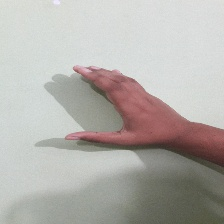

In [13]:
PIL.Image.open(str(oo[1]))

In [ ]:
#from sklearn.model_selection import train_test_split
#train_files, val_files = train_test_split(os.listdir(train_dir), test_size=0.2)

In [14]:
# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=256,
    class_mode='categorical',
    shuffle=True
)

# Data preprocessing for test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=256,
    class_mode='categorical',
    shuffle=False
)

Found 11061 images belonging to 38 classes.
Found 1520 images belonging to 38 classes.


In [15]:
# Load MobileNetV2 as a base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


9406464/9406464 [==============================] - 1s 0us/step


In [16]:
from tensorflow.keras import layers, models
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dense(38, activation='softmax'))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [18]:
# Model training
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
44/44 [==============================] - 129s 3s/step - loss: 2.0549 - accuracy: 0.4244 - val_loss: 1.2430 - val_accuracy: 0.5980
Epoch 2/15
44/44 [==============================] - 119s 3s/step - loss: 1.1188 - accuracy: 0.6518 - val_loss: 0.9979 - val_accuracy: 0.6724
Epoch 3/15
44/44 [==============================] - 119s 3s/step - loss: 0.9344 - accuracy: 0.7076 - val_loss: 0.8632 - val_accuracy: 0.7178
Epoch 4/15
44/44 [==============================] - 119s 3s/step - loss: 0.8329 - accuracy: 0.7401 - val_loss: 0.7678 - val_accuracy: 0.7428
Epoch 5/15
44/44 [==============================] - 119s 3s/step - loss: 0.7838 - accuracy: 0.7484 - val_loss: 0.7369 - val_accuracy: 0.7618
Epoch 6/15
44/44 [==============================] - 120s 3s/step - loss: 0.7217 - accuracy: 0.7701 - val_loss: 0.6774 - val_accuracy: 0.7842
Epoch 7/15
44/44 [==============================] - 119s 3s/step - loss: 0.6875 - accuracy: 0.7794 - val_loss: 0.6759 - val_accuracy: 0.7921
Epoch 8/15
44

In [19]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

6/6 [==============================] - 3s 432ms/step - loss: 0.5742 - accuracy: 0.8066
Test accuracy: 80.66%


In [20]:
# Predict on test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

6/6 [==============================] - 3s 439ms/step


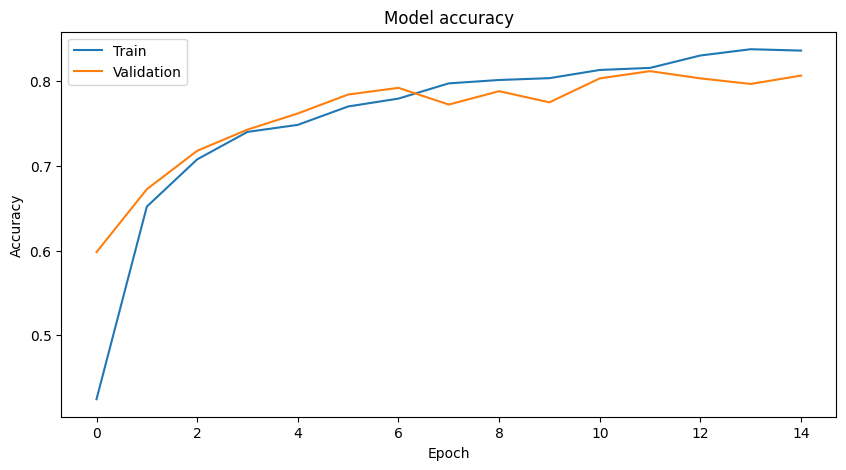

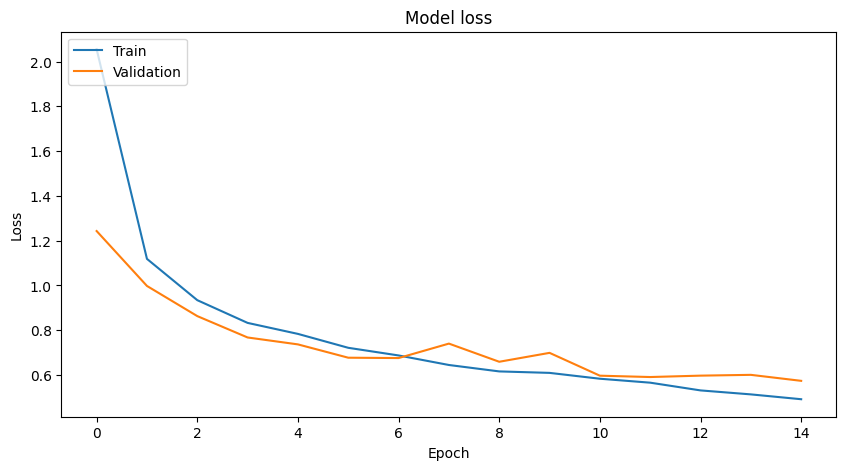

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
# Classification Report
classification_rep = classification_report(true_classes, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.93      0.73        40
           1       1.00      0.70      0.82        40
          10       0.86      0.80      0.83        40
          11       0.95      0.90      0.92        40
          12       0.73      0.80      0.76        40
          13       0.86      0.60      0.71        40
          14       0.69      0.78      0.73        40
          15       0.79      0.65      0.71        40
          16       0.97      0.88      0.92        40
          17       0.92      0.85      0.88        40
          18       0.65      0.82      0.73        40
          19       0.73      0.95      0.83        40
           2       1.00      0.55      0.71        40
          20       0.80      1.00      0.89        40
          21       0.74      0.97      0.84        40
          22       0.63      0.80      0.70        40
          23       0.68      0.85      0.76        40
   

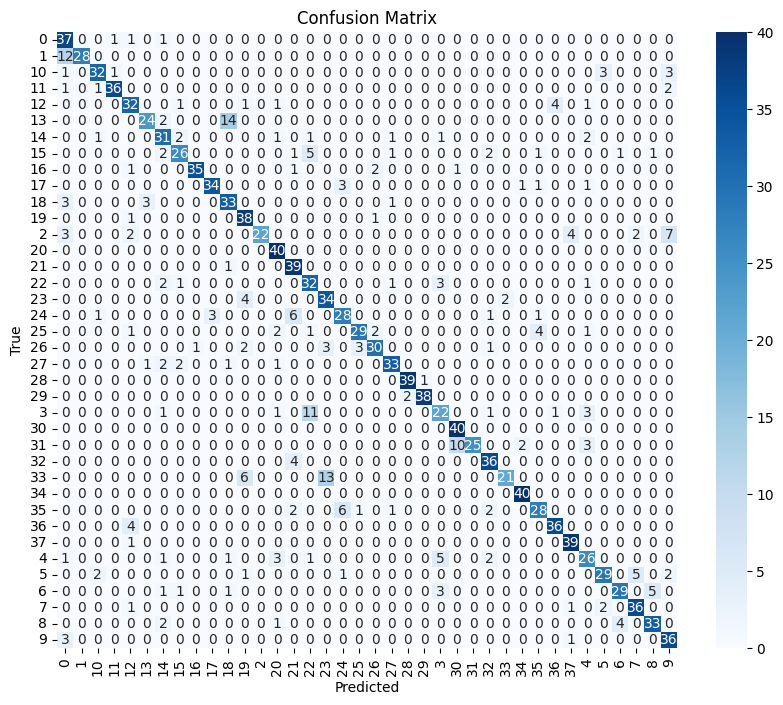

In [23]:
# Confusion Matrix
import seaborn as sns
confusion = confusion_matrix(true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()